In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Style
rc = {
    "axes.facecolor": "#FFFFFF",
    "figure.facecolor": "#FFFFFF",
    "axes.edgecolor": "#000000",
    "grid.color": "#CCCCCC",
    "font.family": "serif",
    "axes.labelcolor": "#000000",
    "xtick.color": "#000000",
    "ytick.color": "#000000",
    "grid.alpha": 0.4,
}
sns.set(rc=rc)
sns.set_palette(palette = 'Blues_r')

# **Disease Symptoms and Patient Profile EDA** ⚕ ⏬

Unveil the mysteries of diseases with our Comprehensive Disease Symptom and Patient Profile Dataset. This captivating dataset offers a treasure trove of information, revealing the fascinating connections between symptoms, demographics, and health indicators. Delve into the rich tapestry of fever, cough, fatigue, and difficulty breathing, intertwined with age, gender, blood pressure, and cholesterol levels. Whether you're a medical researcher, healthcare professional, or data enthusiast, this dataset holds the key to unlocking profound insights. Explore the hidden patterns, uncover unique symptom profiles, and embark on a captivating journey through the world of medical conditions. Get ready to revolutionize healthcare understanding with our dataset. 🏥

---



## **Understanding the Dataset**

### About the Dataset



**Columns and Usage:**
* Disease: The name of the disease or medical condition.
* Fever: Indicates whether the patient has a fever (Yes/No).
* Cough: Indicates whether the patient has a cough (Yes/No).
* Fatigue: Indicates whether the patient experiences fatigue (Yes/No).
* Difficulty Breathing: Indicates whether the patient has difficulty breathing (Yes/No).
* Age: The age of the patient in years.
* Gender: The gender of the patient (Male/Female).
* Blood Pressure: The blood pressure level of the patient (Normal/High/Low).
* Cholesterol Level: The cholesterol level of the patient (Normal/High/Low).
* Outcome Variable: The outcome variable indicating the result of the diagnosis or assessment for the specific disease (Positive/Negative).

---
**This dataset can be used by various stakeholders, including:**
* Healthcare Professionals: Medical practitioners, doctors, and researchers can utilize this dataset for clinical analysis, research studies, and epidemiological investigations related to different diseases. It can aid in understanding the prevalence and patterns of symptoms among patients with specific medical conditions.
* Medical Researchers: Researchers focused on specific diseases or conditions mentioned in the dataset can utilize it to explore relationships between symptoms, age, gender, and other variables. This data can contribute to developing new insights, treatment strategies, and preventive measures.
* Healthcare Technology Companies: Companies developing healthcare applications, diagnostic tools, or AI algorithms can use this dataset to train and validate their models. The data can assist in the development of predictive models for disease diagnosis or monitoring based on symptoms and patient characteristics.



### Read Dataset

In [ ]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vTbFOgvRGWYyABV18PdtzDD36VxdG5L9lkWsjBDBUh8PhL1ImRYAy7asMmx0h8kDiFwZtNYs4bmOa9_/pub?gid=1608649907&single=true&output=csv')

In [ ]:
# display the top row
df.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive


In [ ]:
# display the last row
df.tail()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
344,Stroke,Yes,No,Yes,No,80,Female,High,High,Positive
345,Stroke,Yes,No,Yes,No,85,Male,High,High,Positive
346,Stroke,Yes,No,Yes,No,85,Male,High,High,Positive
347,Stroke,Yes,No,Yes,No,90,Female,High,High,Positive
348,Stroke,Yes,No,Yes,No,90,Female,High,High,Positive


### Data Understand

In [ ]:
df.shape

(349, 10)

the dataset has 349 rows and 10 columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Disease               349 non-null    object
 1   Fever                 349 non-null    object
 2   Cough                 349 non-null    object
 3   Fatigue               349 non-null    object
 4   Difficulty Breathing  349 non-null    object
 5   Age                   349 non-null    int64 
 6   Gender                349 non-null    object
 7   Blood Pressure        349 non-null    object
 8   Cholesterol Level     349 non-null    object
 9   Outcome Variable      349 non-null    object
dtypes: int64(1), object(9)
memory usage: 27.4+ KB


The dataset contains 10 columns, with 9 columns of categorical data type and 1 column of numeric type.

## **Data Preprocessing**

### Missing Values

In [ ]:
df.isnull().sum()

Disease                 0
Fever                   0
Cough                   0
Fatigue                 0
Difficulty Breathing    0
Age                     0
Gender                  0
Blood Pressure          0
Cholesterol Level       0
Outcome Variable        0
dtype: int64

in this dataset no missing values

### Duplicate Data

In [ ]:
print("total duplicat values : ", df.duplicated().sum())

total duplicat values :  49


The existence of duplicate data occurs due to the following possibilities:
* a patient is recorded several times
* patients with the same symptoms and diganosis

In conclusion, duplicate data should **not be deleted** because there is a possibility that the data contains valuable insights.

### Checking Outliers

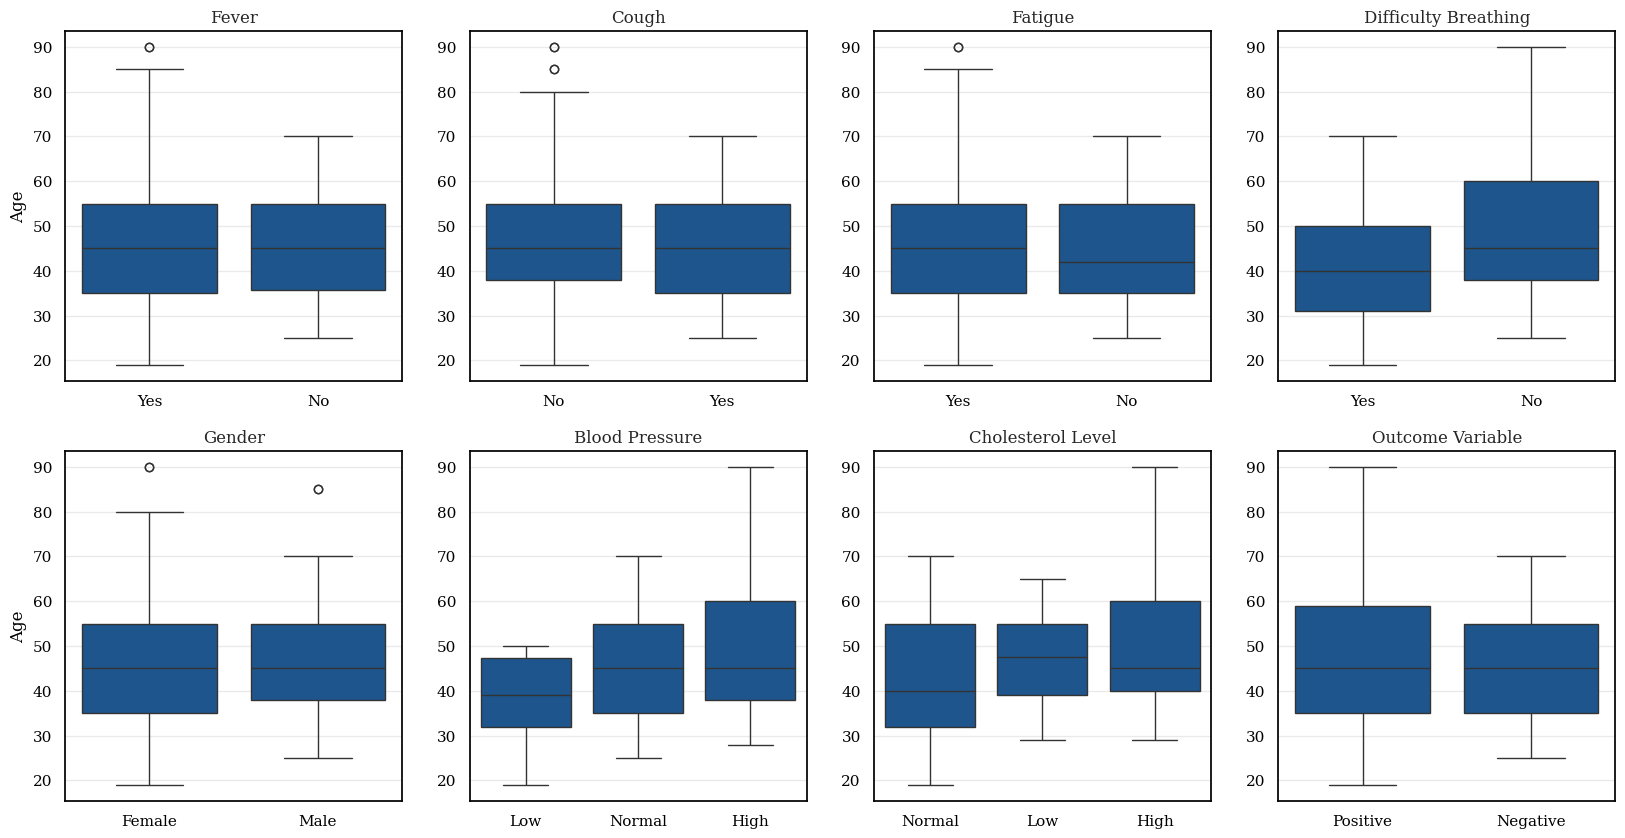

In [ ]:
cols = ['Fever', 'Cough', 'Fatigue', 'Difficulty Breathing',
       'Gender', 'Blood Pressure', 'Cholesterol Level','Outcome Variable']
fig,ax = plt.subplots(ncols = 4, nrows = 2, figsize = (20,10))
ax = ax.flatten()
for i,col in enumerate(cols):
    sns.boxplot(data = df,
                x = col,
                y = 'Age',
                ax = ax[i])
    ax[i].set_title(col)
    ax[i].set_xlabel('')
    if i % 4 != 0:
        ax[i].set_ylabel('')

Here it is not necessary to remove outliers in the age variable because it may contain valuable insights.





### Data Transformation

In [ ]:
df['Age Category'] = pd.cut(
    df['Age'],
    [0, 2, 9, 19, 29, 39, 59, 80, float('inf')],
    labels=['Infancy', 'Childhood', 'Adolescence', 'Early Adulthood',
            'Adulthood', 'Middle Age', 'Early Elder', 'Late Elder']
)

Added an Age Category column to the dataset

*Reference : https://www.myagecalculator.com/blog/life-stages-and-age-groups-40*

In [ ]:
df.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable,Age Category
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive,Adolescence
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative,Early Adulthood
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative,Early Adulthood
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive,Early Adulthood
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive,Early Adulthood


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Disease               349 non-null    object  
 1   Fever                 349 non-null    object  
 2   Cough                 349 non-null    object  
 3   Fatigue               349 non-null    object  
 4   Difficulty Breathing  349 non-null    object  
 5   Age                   349 non-null    int64   
 6   Gender                349 non-null    object  
 7   Blood Pressure        349 non-null    object  
 8   Cholesterol Level     349 non-null    object  
 9   Outcome Variable      349 non-null    object  
 10  Age Category          349 non-null    category
dtypes: category(1), int64(1), object(9)
memory usage: 28.1+ KB


## **Deep Dive EDA**

### Patient Distribution by Demographic

#### General Age Distribution

In [ ]:
df.describe()

,Age
count,349.000000
mean,46.323782
std,13.085090
min,19.000000
25%,35.000000
50%,45.000000
75%,55.000000
max,90.000000


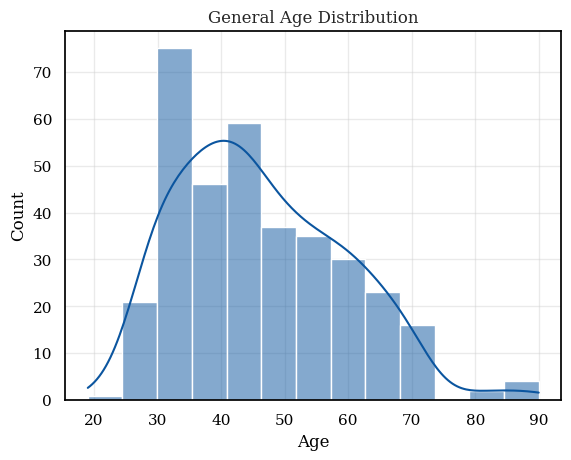

In [ ]:
sns.histplot(df, x='Age', kde=True)
plt.title('General Age Distribution', fontsize=12)
plt.show()

The average age of patients was 46 years old, with the youngest age being 19 years old and the oldest age being 90 years old.

In [ ]:
df[df['Age']==90]

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable,Age Category
347,Stroke,Yes,No,Yes,No,90,Female,High,High,Positive,Late Elder
348,Stroke,Yes,No,Yes,No,90,Female,High,High,Positive,Late Elder


the disease suffered by 90-year-old patients is stroke

In [ ]:
df[df['Age']==19]

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable,Age Category
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive,Adolescence


the disease suffered by 19-year-old patients is Influenza

In [ ]:
df[(df['Age'] >= 40) & (df['Age'] <= 59) & (df['Outcome Variable'] == 'Positive')].drop_duplicates(subset=['Disease'])

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable,Age Category
121,Asthma,Yes,No,Yes,No,40,Male,Low,Normal,Positive,Middle Age
127,Chickenpox,No,Yes,No,No,40,Male,Normal,High,Positive,Middle Age
129,Coronary Artery Disease,No,No,Yes,No,40,Female,High,High,Positive,Middle Age
130,"Eating Disorders (Anorexia,...",No,No,Yes,No,40,Female,High,High,Positive,Middle Age
131,Fibromyalgia,No,No,Yes,No,40,Female,High,High,Positive,Middle Age
132,Gastroenteritis,Yes,Yes,Yes,No,40,Male,High,High,Positive,Middle Age
133,Hemophilia,No,No,Yes,No,40,Female,Normal,Normal,Positive,Middle Age
134,Hyperthyroidism,No,No,Yes,No,40,Male,High,High,Positive,Middle Age
135,Hypoglycemia,No,No,Yes,No,40,Female,High,High,Positive,Middle Age
136,Lymphoma,No,Yes,No,No,40,Female,Normal,High,Positive,Middle Age


With the average patient belonging to the Middle Age Category, the data above displays the types of diseases that patients with this age category suffer from.

#### Age Distribution by Age Category

In [ ]:
age_category_distribution = pd.pivot_table(
    data=df,
    index=['Age Category','Gender'],
    values='Age',
    aggfunc='count'
).reset_index()
print(age_category_distribution)

       Age Category  Gender  Age
0           Infancy  Female    0
1           Infancy    Male    0
2         Childhood  Female    0
3         Childhood    Male    0
4       Adolescence  Female    1
5       Adolescence    Male    0
6   Early Adulthood  Female   15
7   Early Adulthood    Male    6
8         Adulthood  Female   47
9         Adulthood    Male   43
10       Middle Age  Female   74
11       Middle Age    Male   88
12      Early Elder  Female   37
13      Early Elder    Male   34
14       Late Elder  Female    2
15       Late Elder    Male    2


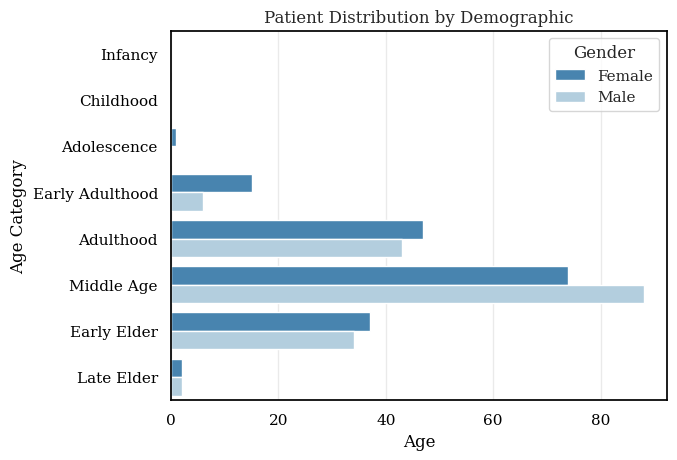

In [ ]:
sns.barplot(data=age_category_distribution, y='Age Category', x='Age', hue='Gender', palette = 'Blues_r')
plt.title('Patient Distribution by Demographic', fontsize=12)
plt.show()

Patients are dominated by the Middle Age Category (40-59 years), followed by the Adulthood Category (30-39 years), and the Early Elder Age Category (60-80 years).

#### Gender Distribution

In [ ]:
df['Gender'].value_counts()

Female    176
Male      173
Name: Gender, dtype: int64

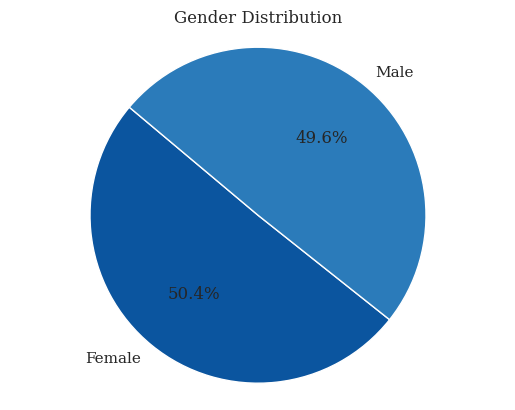

In [ ]:
plt.pie(df['Gender'].value_counts(), labels=df['Gender'].value_counts().index, autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution', fontsize=12)
plt.axis('equal')
plt.show()

Distribution based on patient gender has an almost balanced composition, namely 176 cases (50.4%) for female patient and 173 cases (49.6%) for male patient cases.

### Disease Distribution

In [ ]:
print(df['Disease'].nunique())

116


there are 116 types of diseases suffered by patients

In [ ]:
df['Disease'].value_counts()

Asthma                            23
Stroke                            16
Osteoporosis                      14
Hypertension                      10
Diabetes                          10
                                  ..
Autism Spectrum Disorder (ASD)     1
Hypoglycemia                       1
Fibromyalgia                       1
Eating Disorders (Anorexia,...     1
Williams Syndrome                  1
Name: Disease, Length: 116, dtype: int64

The most **common disease** suffered by patients is Asthma with 23 cases, followed by Stroke 16 cases, Osteoporosis 14 cases, Hypertension 10 cases and Diabetes 10 cases.
While for **rare diseases** such as Autism Spectrum Disorder (ASD), Hypoglycemia, Fibromyalgia, Eating Disorders, Williams Syndrome, and other diseases with 1 case each.



#### Total number of Common and Rare Disease

**Description:**
* for common disease is a disease contained in the dataset with more than 3 cases.
* while for rare disease is a disease contained in the dataset with the number of cases less than equal to 3 cases.

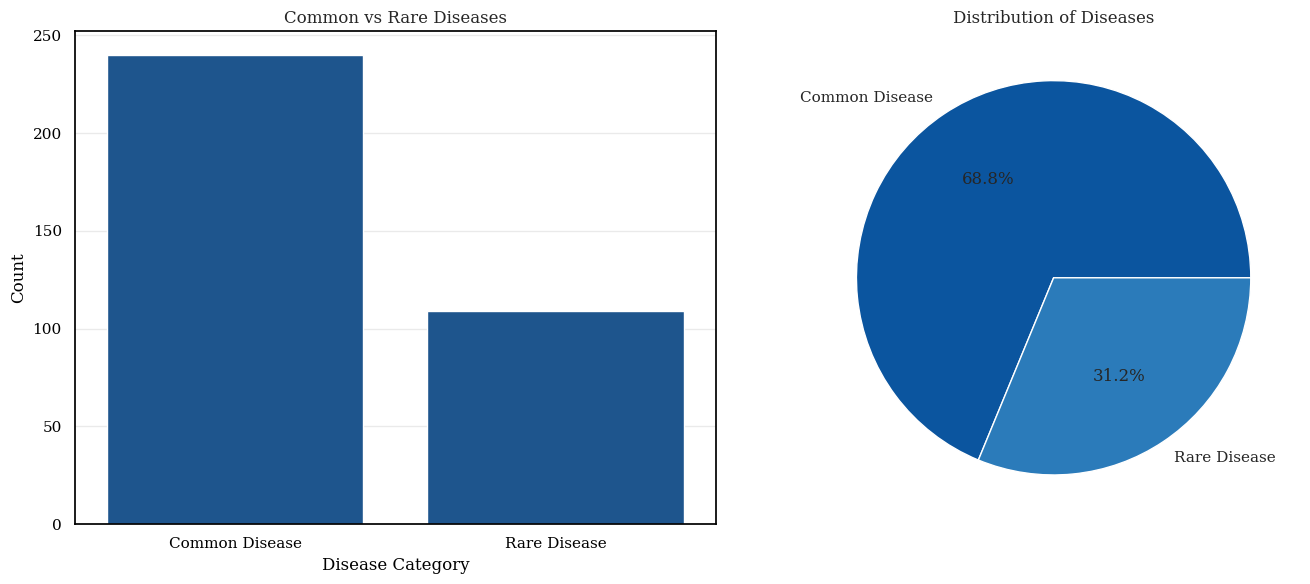

         Category  Count
0  Common Disease    240
1    Rare Disease    109


In [ ]:
disease_counts = df['Disease'].value_counts()
common_disease_count = disease_counts[disease_counts > 3].sum()
rare_disease_count = disease_counts[disease_counts <= 3].sum()

disease_summary = pd.DataFrame({'Category': ['Common Disease', 'Rare Disease'],
                                'Count': [common_disease_count, rare_disease_count]})

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.barplot(data=disease_summary, x='Category', y='Count')

plt.xlabel('Disease Category')
plt.ylabel('Count')
plt.title('Common vs Rare Diseases')

plt.subplot(1, 2, 2)
plt.pie(disease_summary['Count'], labels=disease_summary['Category'], autopct='%1.1f%%')
plt.title('Distribution of Diseases')

plt.tight_layout()
plt.show()
print(disease_summary)

The data shows that there are two types of diseases: common diseases with 240 cases (68.8%) and rare diseases with 109 cases (31.2%). Common diseases have a higher prevalence, requiring greater health resources. However, attention to rare diseases is also important for better research and treatment.

#### Detail of Common Disease

<ipython-input-72-a371ad8d7a2d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


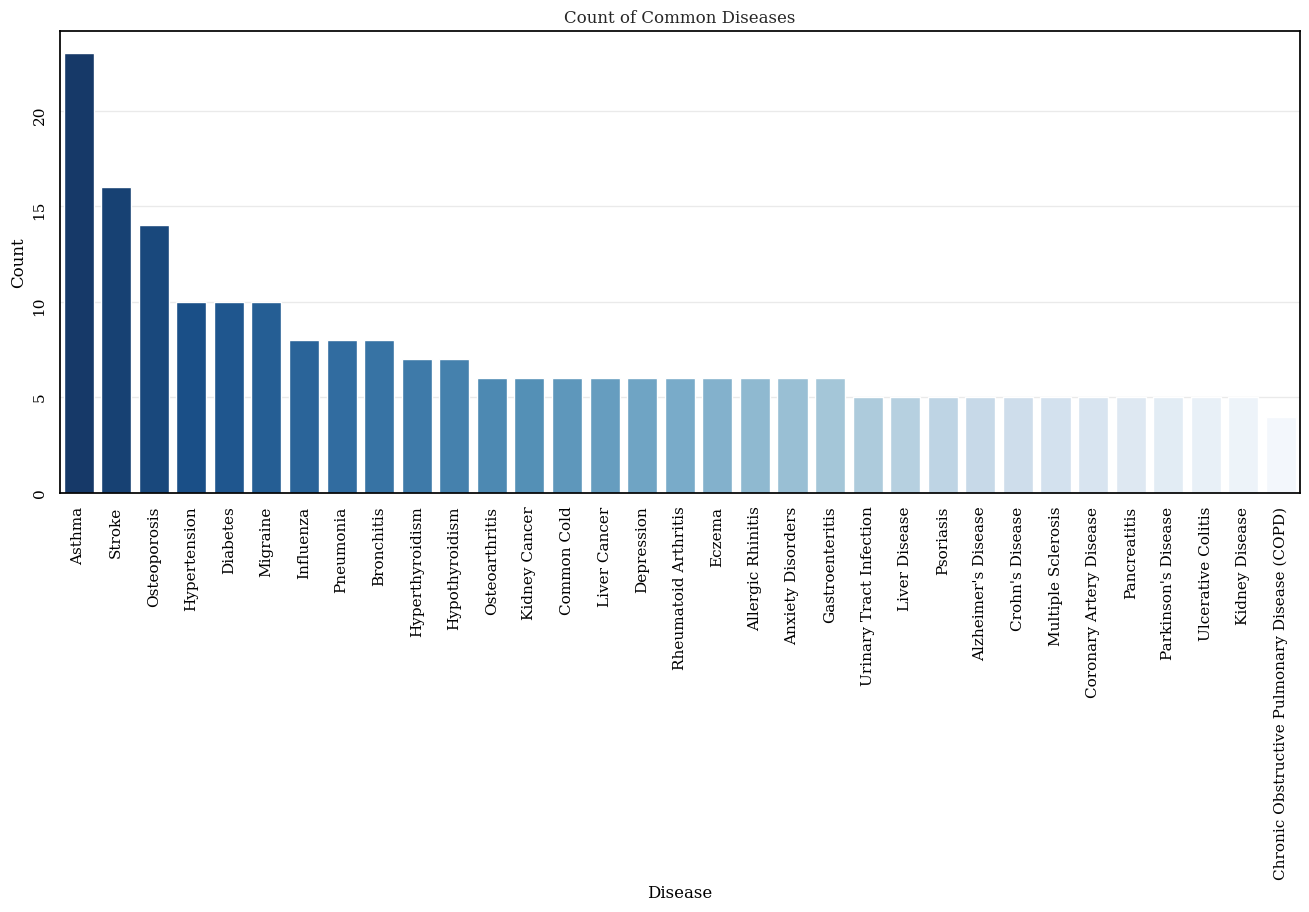

In [ ]:
a = df['Disease'].value_counts()
Figure, Axes = plt.subplots(1,1,figsize = (16,6))
sns.barplot(
    x = a[a.values > 3].index,
    y = a[a.values > 3].values,
    palette= 'Blues_r'
)
Axes.tick_params(labelrotation=90)
Axes.set_title('Count of Common Diseases', fontsize = 12)
plt.xlabel('Disease')
plt.ylabel('Count')
plt.show()

Asthma was the dominant health problem with 23 cases, followed by Stroke with 16 cases, and Osteoporosis with 14 cases. Then Hypertension, Diabetes and Migraine with 10 cases each. These conditions require special attention due to their long-term impact. Influenza, Pneumonia, and Bronchitis had 8 cases each, showing the variation in medical conditions. Other conditions such as Hyperthyroidism, Hypothyroidism, Osteoarthritis, Kidney Cancer, Common Cold, Liver Cancer, Depression, and others are also significant. Although some conditions have a lower number of cases, such as Chronic Obstructive Pulmonary Disease (COPD) with 4 cases, each condition has a significant impact on the affected individuals.

In [ ]:
df['Disease'].value_counts().head(33)

Asthma                                          23
Stroke                                          16
Osteoporosis                                    14
Hypertension                                    10
Diabetes                                        10
Migraine                                        10
Influenza                                        8
Pneumonia                                        8
Bronchitis                                       8
Hyperthyroidism                                  7
Hypothyroidism                                   7
Osteoarthritis                                   6
Kidney Cancer                                    6
Common Cold                                      6
Liver Cancer                                     6
Depression                                       6
Rheumatoid Arthritis                             6
Eczema                                           6
Allergic Rhinitis                                6
Anxiety Disorders              

#### Detail of Rare Disease

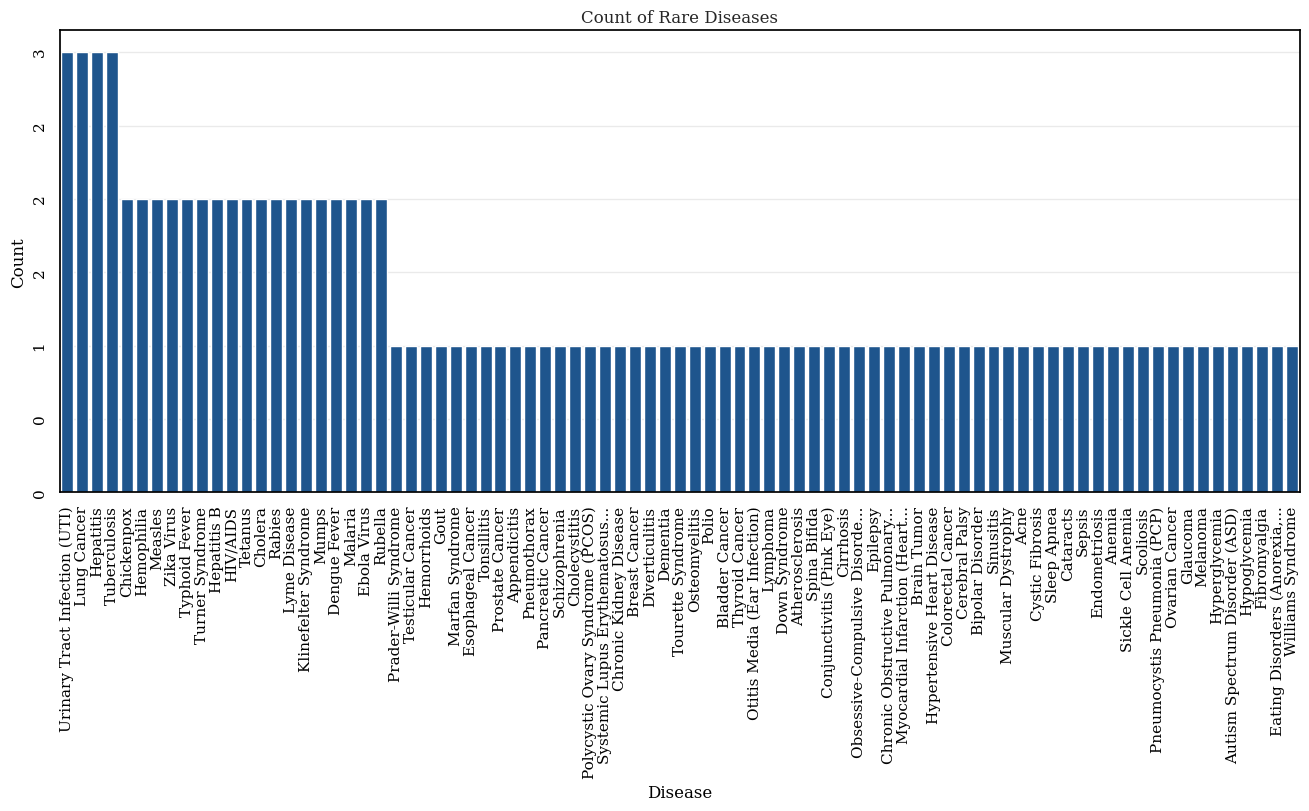

In [ ]:
a = df['Disease'].value_counts()
fig, axes = plt.subplots(1, 1, figsize=(16, 6))
sns.barplot(
    x=a[a.values <= 3].index,
    y=a[a.values <= 3].values,
    axes=axes
)
axes.tick_params(labelrotation=90)
axes.set_title('Count of Rare Diseases', fontsize=12)
plt.xlabel('Disease')
plt.ylabel('Count')
axes.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.0f}'.format(x)))
plt.show()

### Symptoms Factor

The symptoms factor consist of the variables Fever, Cough, Fatigue, and Difficulty Breathing.

#### Total number of patient with Fever

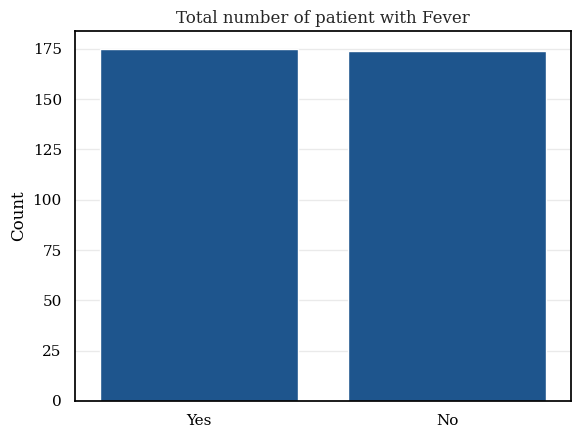

Yes    175
No     174
Name: Fever, dtype: int64


In [ ]:
sns.barplot(df['Fever'].value_counts(), order=['Yes', 'No'])
plt.title('Total number of patient with Fever', fontsize=12)
plt.ylabel('Count')
plt.show()
print(df['Fever'].value_counts())

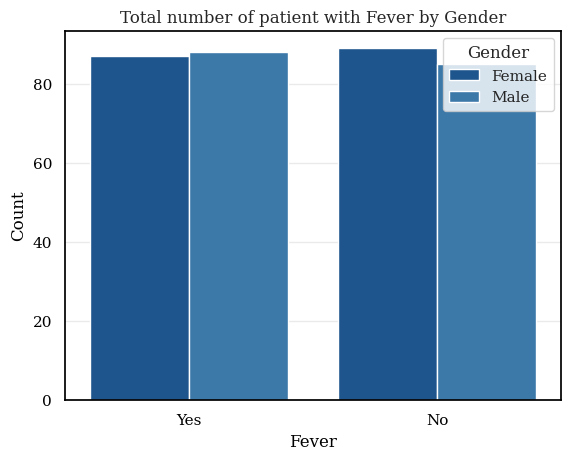

   Gender Fever  Count
0  Female    No     89
1  Female   Yes     87
2    Male    No     85
3    Male   Yes     88


In [ ]:
fever_by_gender = df.groupby(['Gender', 'Fever']).size().reset_index(name='Count')
sns.barplot(x='Fever', y='Count', hue='Gender', data=fever_by_gender, order=['Yes', 'No'])
plt.title('Total number of patient with Fever by Gender', fontsize=12)
plt.ylabel('Count')
plt.xlabel('Fever')
plt.show()
print(fever_by_gender)

175 patients had fever symptoms. Among them, there were 87 female patients and 88 male patients. This suggests that fever is a symptom that may affect both sexes similarly, with very little difference between the number of female and male patients experiencing this symptom.

#### Total number of patient with Cough

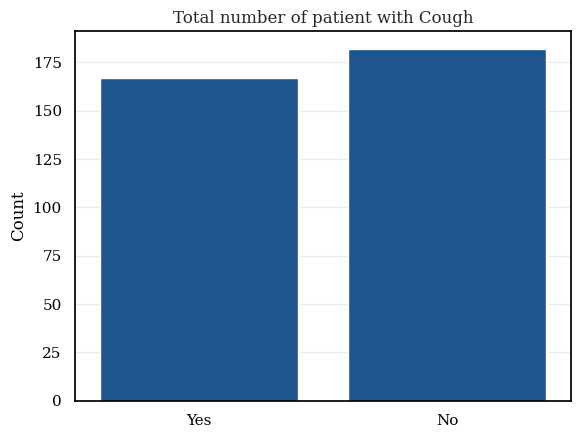

No     182
Yes    167
Name: Cough, dtype: int64


In [ ]:
sns.barplot(df['Cough'].value_counts(), order=['Yes', 'No'])
plt.title('Total number of patient with Cough', fontsize=12)
plt.ylabel('Count')
plt.show()
print(df['Cough'].value_counts())

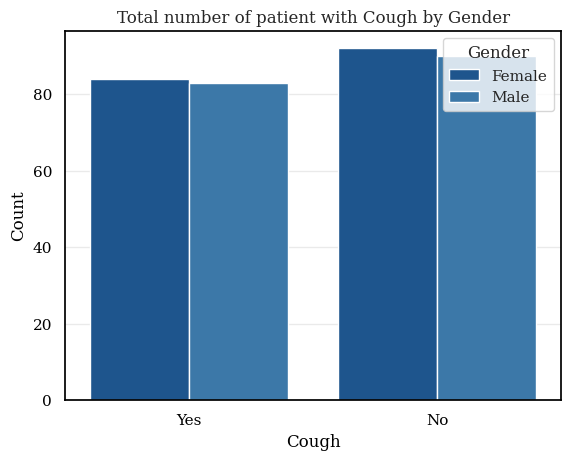

   Gender Cough  Count
0  Female    No     92
1  Female   Yes     84
2    Male    No     90
3    Male   Yes     83


In [ ]:
cough_by_gender = df.groupby(['Gender', 'Cough']).size().reset_index(name='Count')
sns.barplot(x='Cough', y='Count', hue='Gender', data=cough_by_gender, order=['Yes', 'No'])
plt.title('Total number of patient with Cough by Gender', fontsize=12)
plt.ylabel('Count')
plt.xlabel('Cough')
plt.show()
print(cough_by_gender)

167 patients had cough symptoms. Among them, there were 84 female patients and 83 male patients. Cough symptoms showed no significant difference in distribution between the two genders of patients in the population.

#### Total number of patient with Fatigue

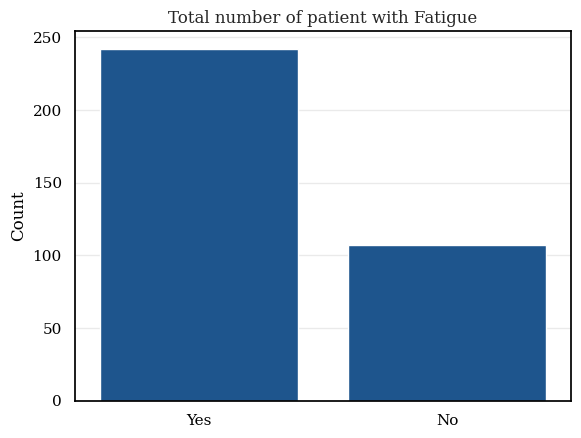

Yes    242
No     107
Name: Fatigue, dtype: int64


In [ ]:
sns.barplot(df['Fatigue'].value_counts(), order=['Yes', 'No'])
plt.title('Total number of patient with Fatigue', fontsize=12)
plt.ylabel('Count')
plt.show()
print(df['Fatigue'].value_counts())

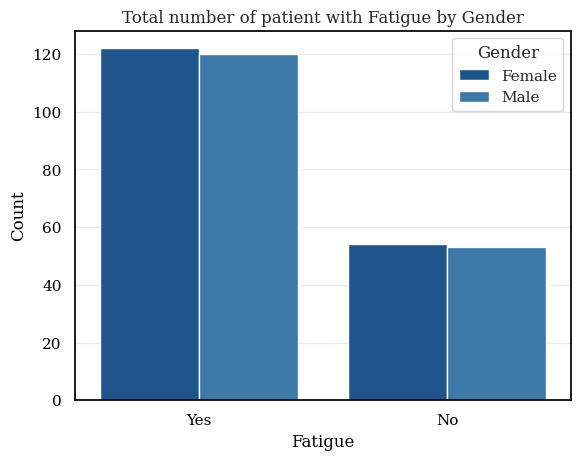

   Gender Fatigue  Count
0  Female      No     54
1  Female     Yes    122
2    Male      No     53
3    Male     Yes    120


In [ ]:
fatigue_by_gender = df.groupby(['Gender', 'Fatigue']).size().reset_index(name='Count')
sns.barplot(x='Fatigue', y='Count', hue='Gender', data=fatigue_by_gender, order=['Yes', 'No'])
plt.title('Total number of patient with Fatigue by Gender', fontsize=12)
plt.ylabel('Count')
plt.xlabel('Fatigue')
plt.show()
print(fatigue_by_gender)

242 patients had fatigue symptoms. Among them, there were 122 female patients and 120 male patients. The proportion of female patients with fatigue symptoms was almost the same as the proportion of male patients. These results highlight that fatigue symptoms may affect both genders in a similar way.

#### Total number of patient with Difficulty Breathing

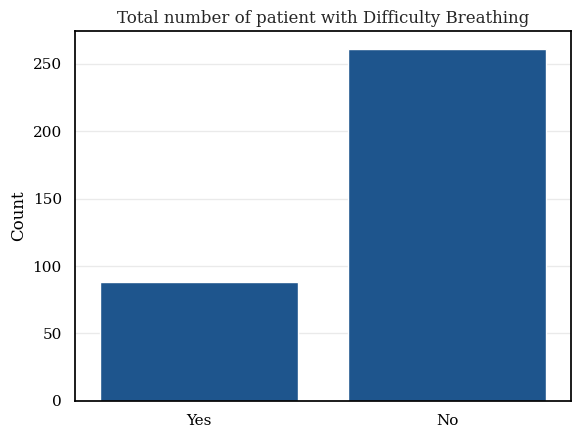

No     261
Yes     88
Name: Difficulty Breathing, dtype: int64


In [ ]:
sns.barplot(df['Difficulty Breathing'].value_counts(), order=['Yes', 'No'])
plt.title('Total number of patient with Difficulty Breathing', fontsize=12)
plt.ylabel('Count')
plt.show()
print(df['Difficulty Breathing'].value_counts())

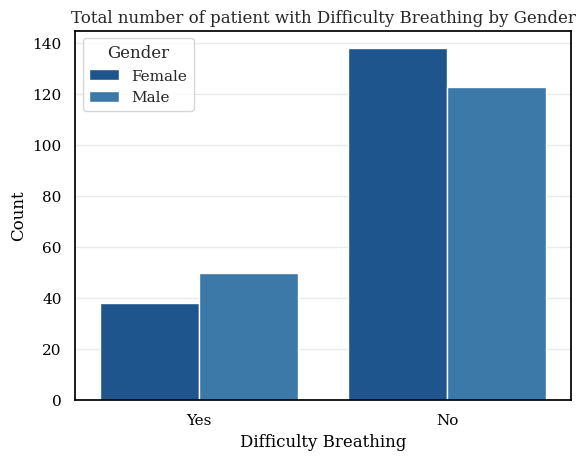

   Gender Difficulty Breathing  Count
0  Female                   No    138
1  Female                  Yes     38
2    Male                   No    123
3    Male                  Yes     50


In [ ]:
db_by_gender = df.groupby(['Gender', 'Difficulty Breathing']).size().reset_index(name='Count')
sns.barplot(x='Difficulty Breathing', y='Count', hue='Gender', data=db_by_gender, order=['Yes', 'No'])
plt.title('Total number of patient with Difficulty Breathing by Gender', fontsize=12)
plt.ylabel('Count')
plt.xlabel('Difficulty Breathing')
plt.show()
print(db_by_gender)

88 patients had difficulty breathing symptoms. Among them, there were 38 female patients and 50 male patients. From the data, it can be seen that there is a significant difference between the number of female and male patients who experience difficulty breathing. The proportion of male patients with symptoms of difficulty breathing is higher than the proportion of female patients.

### Medical Factor

The medical factor consists of the variables Blood Pressure and Cholesterol Level.

**Description for Blood Pressure:**
* Normal blood pressure is generally systolic less than 120 mmHg and diastolic less than 80 mmHg.
* High blood pressure, commonly called hypertension, is caused by a systolic higher than 140 mmHg or a diastolic higher than 90 mmHg.
* Low blood pressure, commonly called hypotension, is caused by systolic lower than 90 mmHg or diastolic lower than 60 mmHg.

Source:
1. https://hellosehat.com/jantung/tekanan-darah-normal/
2. https://dinkes.kulonprogokab.go.id/detil/20/periksa-tekanan-darah-anda-secara-teratur
3. https://hellosehat.com/jantung/hipertensi/pengertian-tekanan-darah-adalah/

**Description for Cholesterol Level:**
1. **Total cholesterol :** *Normal: Less than 200 mg/dL, High: 239 mg/dL or more, Low: Less than 170 mg/dL*
2. **HDL cholesterol (good cholesterol) :** *Normal: More than 40 mg/dL, High: More than 60 mg/dL, Low: Less than 40 mg/dL*
3. **LDL cholesterol (bad cholesterol) :** *Normal: Less than 100 mg/dL, High: Less than 130 mg/dL, Low: Less than 110 mg/dL*
4. **Non-HDL (total cholesterol with LDL levels) :** *Normal: Less than 120 mg/dL, High: Less than 130 mg/dL, Low: Less than 100 mg/dL*
5. **Cholesterol triglycerides :** *Normal: Less than 150 mg/dL, High: 150-199 mg/dL, Low: Less than 150 mg/dL*

*Note: Normal, high and low cholesterol levels may vary by age and gender.*

*Source: https://www.halodoc.com/artikel/perlu-tahu-ini-kadar-kolesterol-normal-berdasarkan-usia*

#### Results Blood Pressure and Cholesterol Level by patient age in overall data

In [ ]:
def plots(df, y):
    grouped = df.groupby(y)
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(17, 5))
    sns.histplot(df,x='Age',hue=y,kde=True, ax=axes[0])
    sns.barplot(x=grouped['Age'].mean().index, y=grouped['Age'].mean(), ax=axes[1])

    for container in axes[1].containers:
        axes[1].bar_label(container, size=10)

    freqs = df[y].value_counts()
    axes[2].pie(freqs, labels=freqs.index, autopct='%0.2f%%')

    plt.show()

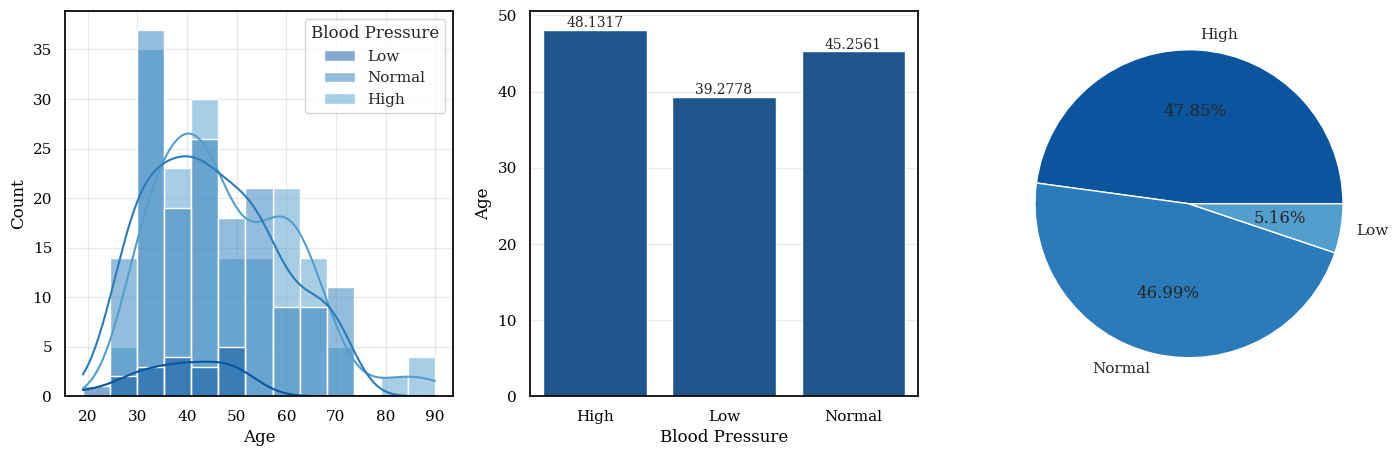

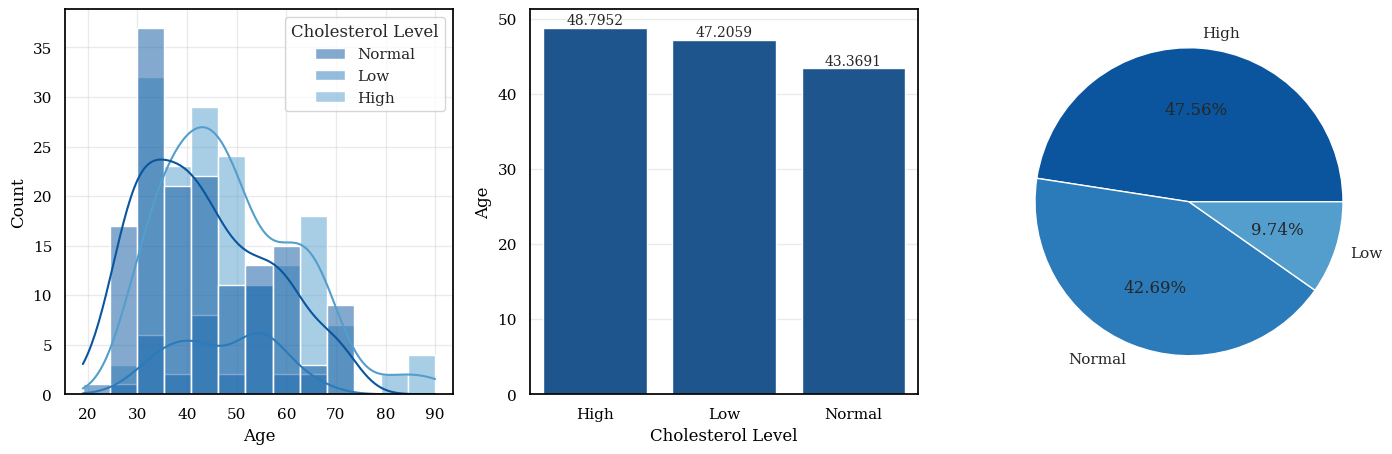

In [ ]:
cat_vis = ['Blood Pressure', 'Cholesterol Level']
for i in cat_vis:
    plots(df, i)

Overall patient data tends to have high blood pressure as much as 47.85% with an average age of 48 years. Then, patients who have normal blood pressure are 46.99% with an average age of 45 years. While patients who have low blood pressure are only about 5.16% with an average age of 39 years.

Overall patient data tends to have high cholesterol level as much as 47.56% with an average age of 48 years. Then, patients who have normal cholesterol level are 42.69% with an average age of 43 years. While patients who have low cholesterol level are only about 9.74% with an average age of 47 years.

#### Results of Blood Pressure and Cholesterol Levels based on healthy patients (Negative Test Result)

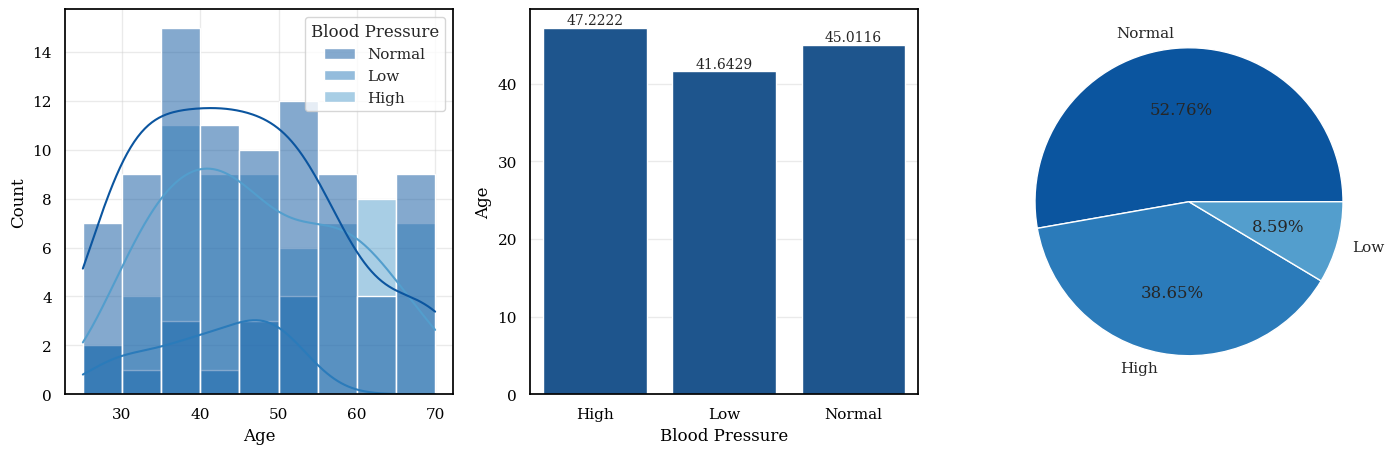

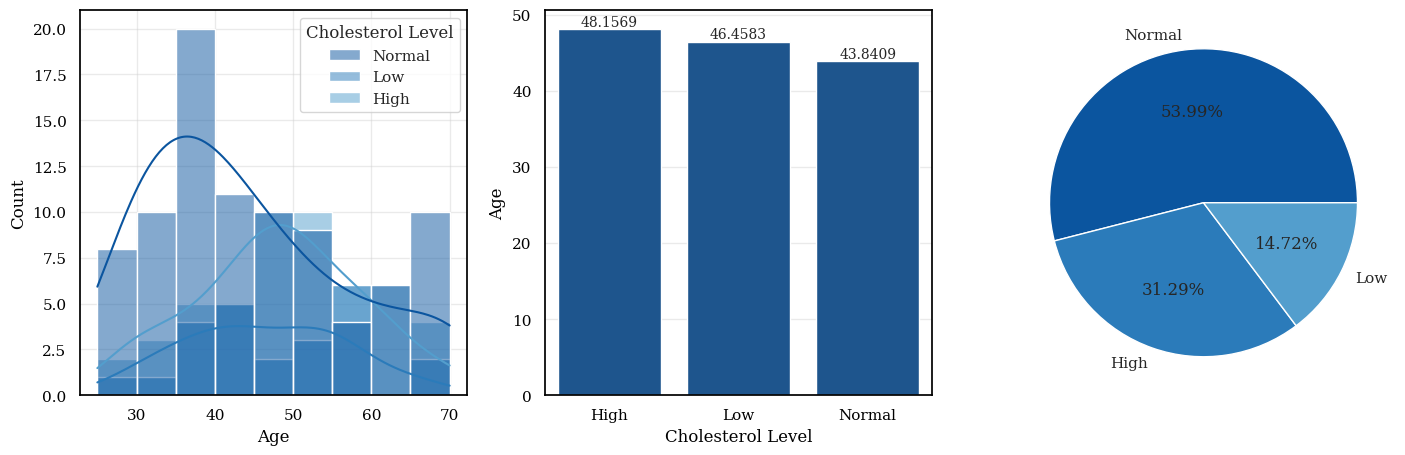

In [ ]:
for i in cat_vis:
    plots(df[df['Outcome Variable'] == 'Negative'], i)

In the screening of healthy patients, they tended to have normal blood pressure, 52.76% with an average age of 45 years. While patients with high and low blood pressure were only about 38.65% and 8.59% with the average age was 47 and 41 years.

In the screening of healthy patients, they tended to have a normal cholesterol level of 53.99% with an average age of 43 years. While for patients with high and low cholesterol levels were only about 31.29% and 14.72% with the average age was 48 and 46 years.

Patients with **Negative** test results for the disease tend to have **Normal Blood Pressure and Cholesterol level**.

#### Results of Blood Pressure and Cholesterol Levels based on unhealthy patients (Positive Test Result)

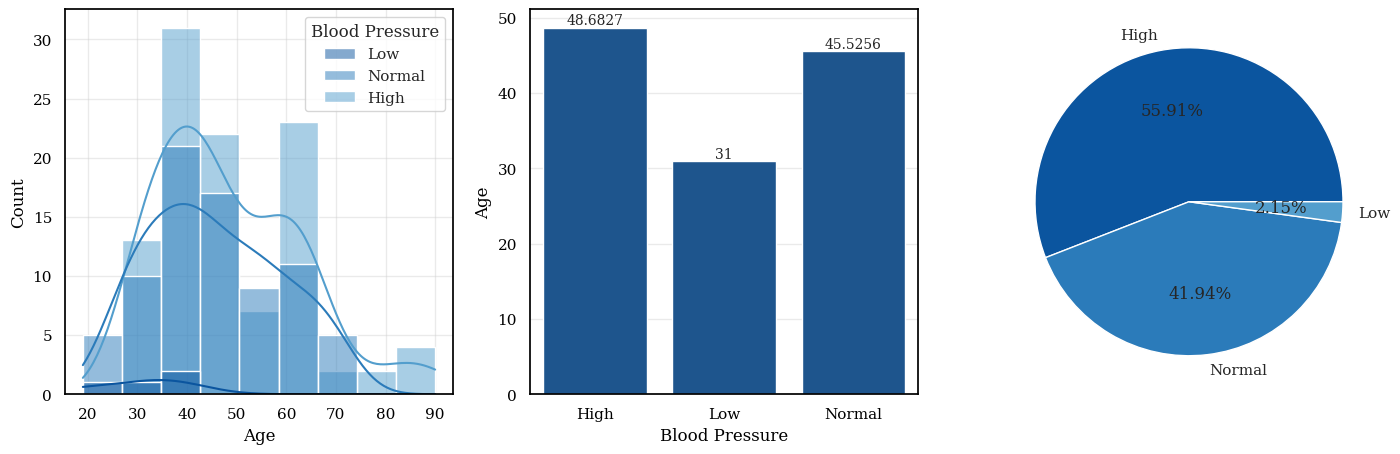

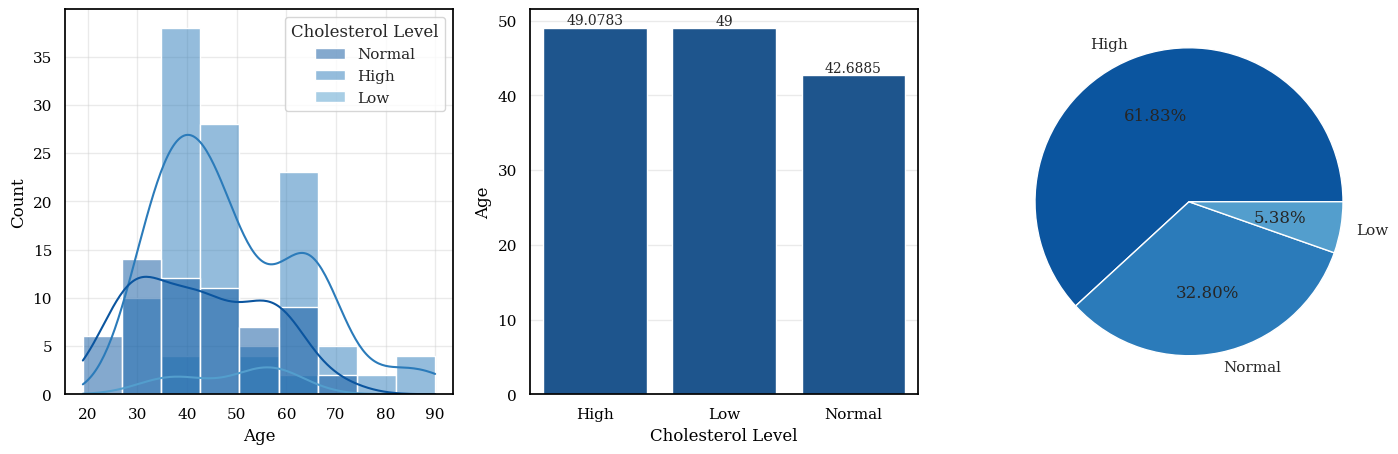

In [ ]:
for i in cat_vis:
    plots(df[df['Outcome Variable'] == 'Positive'], i)

In the examination of unhealthy patients, they tend to have high blood pressure, as many as 55.91% with an average age of 48 years. While patients with normal blood pressure are 41.94% with an average age of 45 years. While patients with low blood pressure are only about 2.15% with an average age of 31 years.

In the examination of unhealthy patients, they tend to have high cholesterol levels, as many as 61.83% with an average age of 49 years. While patients with normal cholesterol levels were 32.8% with an average age of 42 years. While patients with low cholesterol levels are only about 5.38% with an average age of 49 years.

Patients with **Positive** test results for the disease tend to have **High Blood Pressure and Cholesterol level**.

#### Patient Disease Diagnosis Results

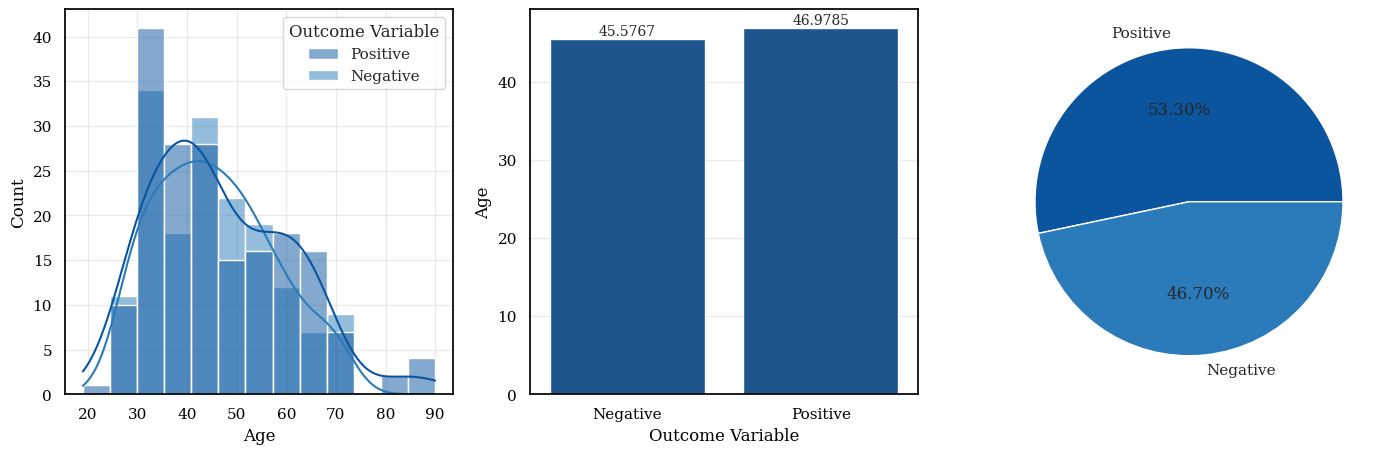

In [ ]:
plots(df, 'Outcome Variable')

Based on the diagnosis results, 53.4% of patients were positive for the predicted disease, while 46.7% of patients with negative results.

Based on the diagnosis results, many patients are positive for certain diseases based on various factors.

## **Data Encoding**

Perform the data encoding process by converting the value of each column except the 'Disease' column which has a categorical data type into a numeric data type value. The purpose of the data encoding process is to be able to manipulate data for further processes such as performing correlation analysis.

In [ ]:
data = df.copy()
data.replace({'Yes':1,'No':0},inplace=True)
data.replace({'Positive':1,'Negative':0},inplace=True)
data.replace({'Low':0,'Normal':1,'High':2},inplace=True)
data.replace({'Female':0,'Male':1},inplace=True)

In [ ]:
data = data.drop(columns=['Age Category'])

In [ ]:
data.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,1,0,1,1,19,0,0,1,1
1,Common Cold,0,1,1,0,25,0,1,1,0
2,Eczema,0,1,1,0,25,0,1,1,0
3,Asthma,1,1,0,1,25,1,1,1,1
4,Asthma,1,1,0,1,25,1,1,1,1


## **Pearson Correlation Analysis**

<ipython-input-91-44c3284d4ff2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(method='pearson'), annot=True, cmap='Blues')


Text(0.5, 1.0, 'Correlation Heatmap')

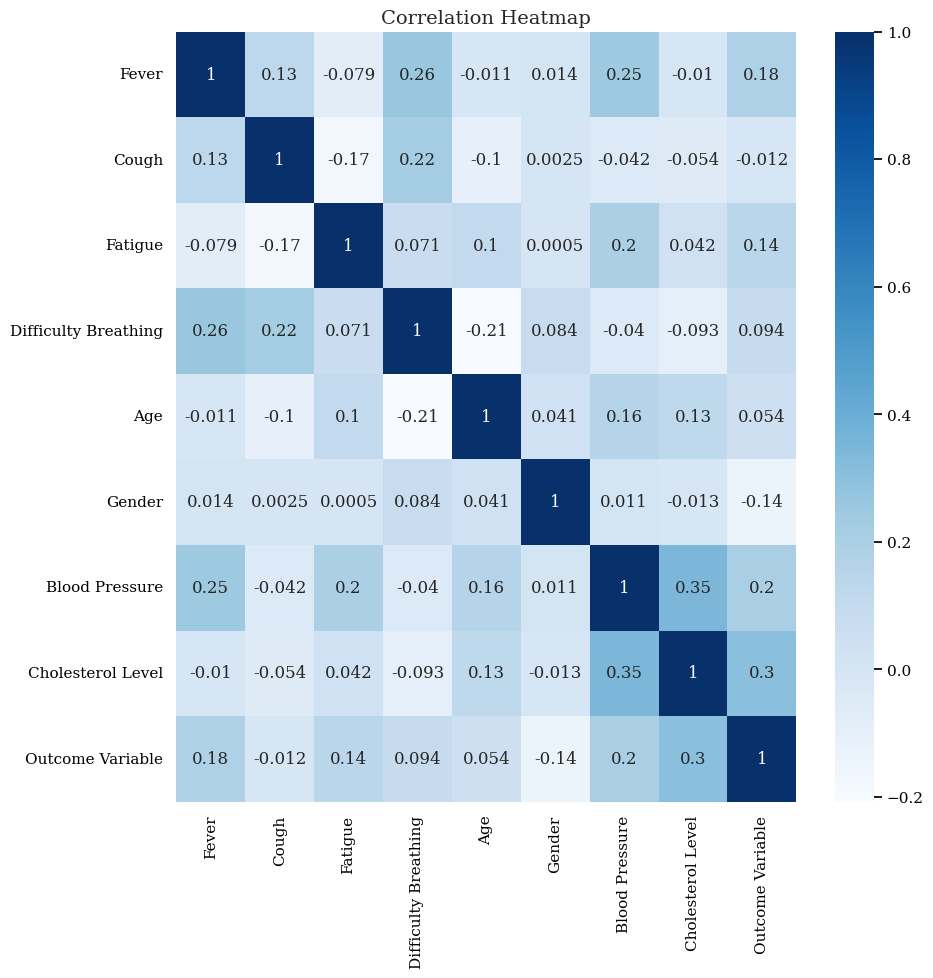

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(method='pearson'), annot=True, cmap='Blues')
plt.title('Correlation Heatmap', fontsize=14)

**Interpretation of Pearson Correlation**

The following are the findings based on the pearson correlation above:
1. Fever has a weak positive correlation with Fatigue, indicating that patient with fever tend to feel more tired.
2. Fever and Fatigue have a weak positive correlation with Blood Pressure, indicating that patient with fever tend to have higher Blood Pressure.
3. Fever and Fatigue Have a weak positive correlation with Outcome Variable, indicating that patient with fever or fatigue are more likely to have Outcome Variable 1 (Positive) for a disease.
4. Difficulty Breathing has a weak positive correlation with Cough, indicating that patient who have difficulty breathing tend to be accompanied by cough.
5. Age has a weak positive correlation with Blood Pressure and Cholesterol Level, indicating that older patient tend to have higher Blood Pressure and Cholesterol Level.
6. Blood Pressure and Cholesterol Level have a weak positive correlation with the Outcome Variable, indicating that patient with higher blood pressure and cholesterol levels are more likely to have Outcome Variable 1 (Positive) for a disease.

*Based on the correlation analysis, the recommendation for patients is to maintain and pay attention to blood pressure and cholesterol levels, besides that patients should also pay attention to age and personal health factors when symptoms occur such as fever, cough, fatigue and difficulty breathing to get a more healthy life.*

## **Summary of EDA**

1. The average age of patients was 46 years, with the youngest age being 19 years and the oldest age being 90 years. Patients are dominated by the Middle Age category which ranges from 40-59 years old. The disease suffered by the youngest patient is Influenza, while the disease suffered by the oldest age is Stroke, while for patients in the Middle Age category, diseases that are often suffered are Asthma, Chickenpox, Coronary Artery Disease, and others.

2. Distribution based on patient gender has an almost balanced composition, namely 176 cases (50.4%) for female patient and 173 cases (49.6%) for male patient cases.

3. In the distribution of diseases, Common Diseases were 240 cases (68.8%) while Rare Diseases were 109 cases (31.2%). The most Common Diseases suffered by patients included Asthma with 23 cases, followed by Stroke 16 cases, Osteoporosis 14 cases, Hypertension 10 cases and Diabetes 10 cases. Meanwhile, the Rare Diseases suffered by patients include Autism Spectrum Disorder (ASD), Hypoglycemia, Fibromyalgia, Eating Disorders, Williams Syndrome, and other diseases each 1 case.

4. Symptom Factors such as Fever, Cough, Fatigue and Difficulty Breathing are symptoms that are often experienced by patients where there are 175 reports stating feeling Fever, 167 reports stating feeling Cough, 242 reports stating feeling Fatigue and 88 reports stating feeling Difficulty Breathing. The symptom factor Fatigue is most often felt by patients then followed by symptoms of Fever and Cough, while for Difficulty Breathing symptoms are least often felt by patients.

5. For Medical Factors, patients have Blood Pressure and Cholesterol Level that tend to be high. For healthy patients have Blood Pressure and Cholesterol Level that tend to be Normal, while for unhealthy patients have Blood Pressure and Cholesterol Level that tend to be high. Based on the results of the Medical Factor Assessment, the level of Blood Pressure and Cholesterol Level greatly affects the health of a patient. Then based on the results of the diagnosis, there are more patients who are declared positive for a disease compared to patients who are declared negative for a disease.

6. Based on the correlation analysis, the recommendation for patients is to maintain and pay attention to blood pressure and cholesterol levels, besides that patients should also pay attention to age and personal health factors when symptoms occur such as fever, cough, fatigue and difficulty breathing to get a more healthy life.